In [1]:
import pandas as pd
import numpy as np
import prophet
import matplotlib.pyplot as plt

In [98]:
data = pd.read_csv('../preprocessing/melbourne_data.csv')
data = data.loc[(data['month'] != 1) & (data['month'] != 9)]
data = data.groupby(by=["date_1"]).mean()
data = data[['Total']]
data.head()

Total
date_1            
10-01   174.400000
10-02   219.333333
10-03   306.523810
10-04   249.500000
10-05   241.285714

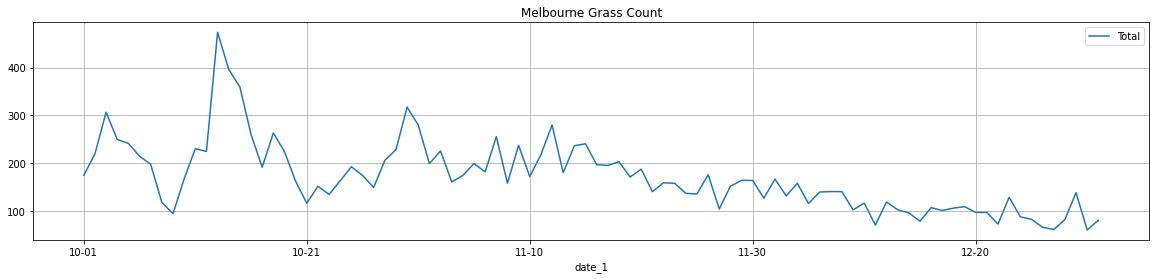

In [99]:
data.plot(figsize=(20, 4))
plt.grid()
plt.legend(loc='best')
plt.title('Melbourne Grass Count')
plt.show(block=False)

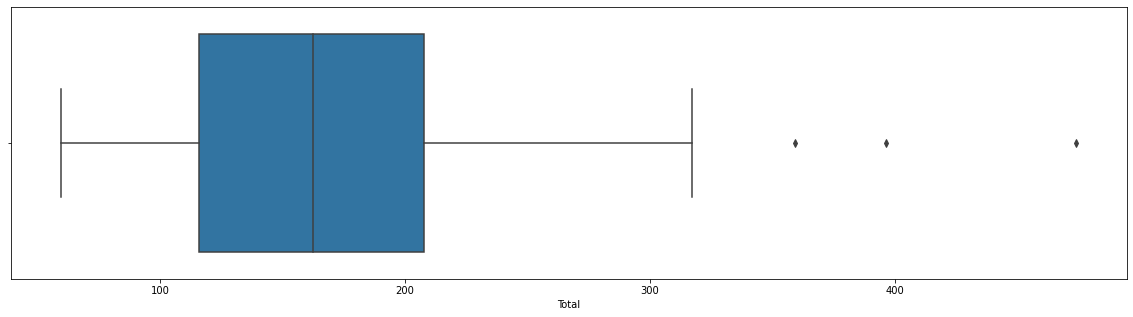

In [100]:
import seaborn as sns
fig = plt.subplots(figsize=(20, 5))
ax = sns.boxplot(x=data['Total'],whis=1.5)

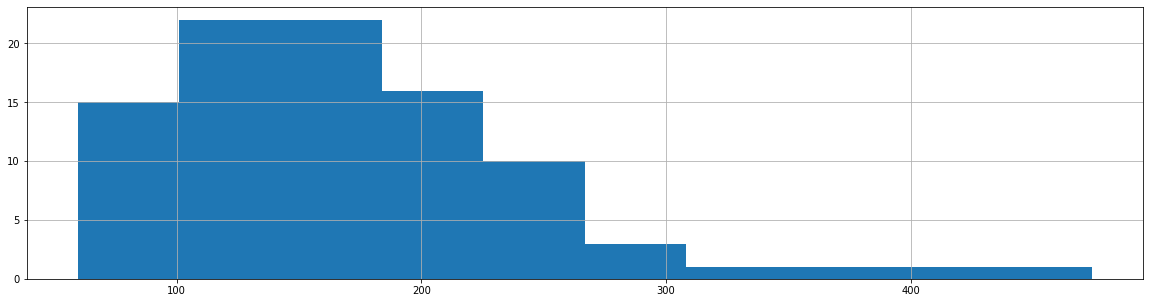

In [101]:
fig = data.Total.hist(figsize = (20,5))

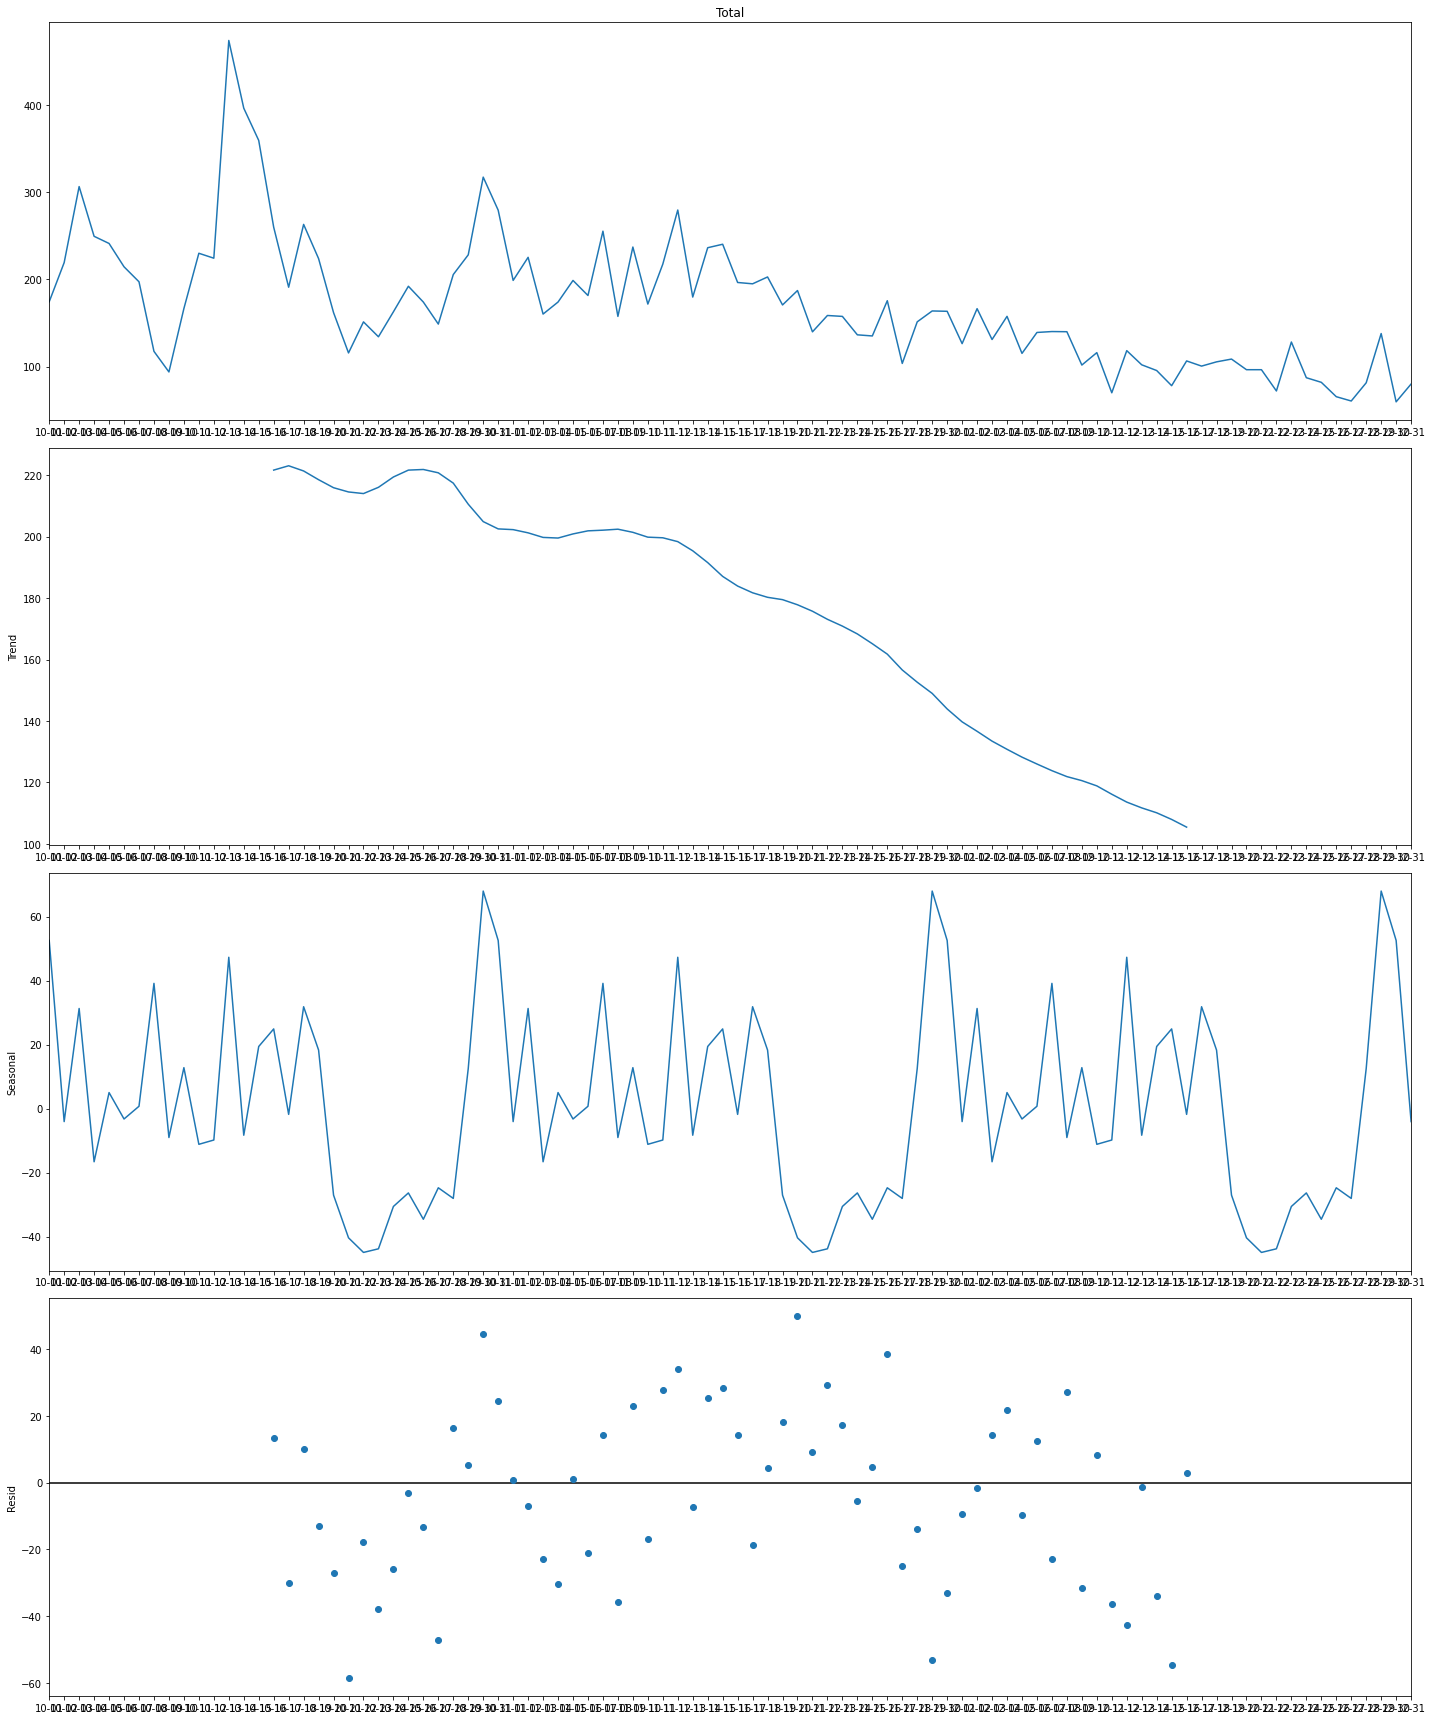

In [104]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 20,24
decomposition = sm.tsa.seasonal_decompose(data.Total, model='additive', period=30) # additive seasonal index
fig = decomposition.plot()
plt.show()

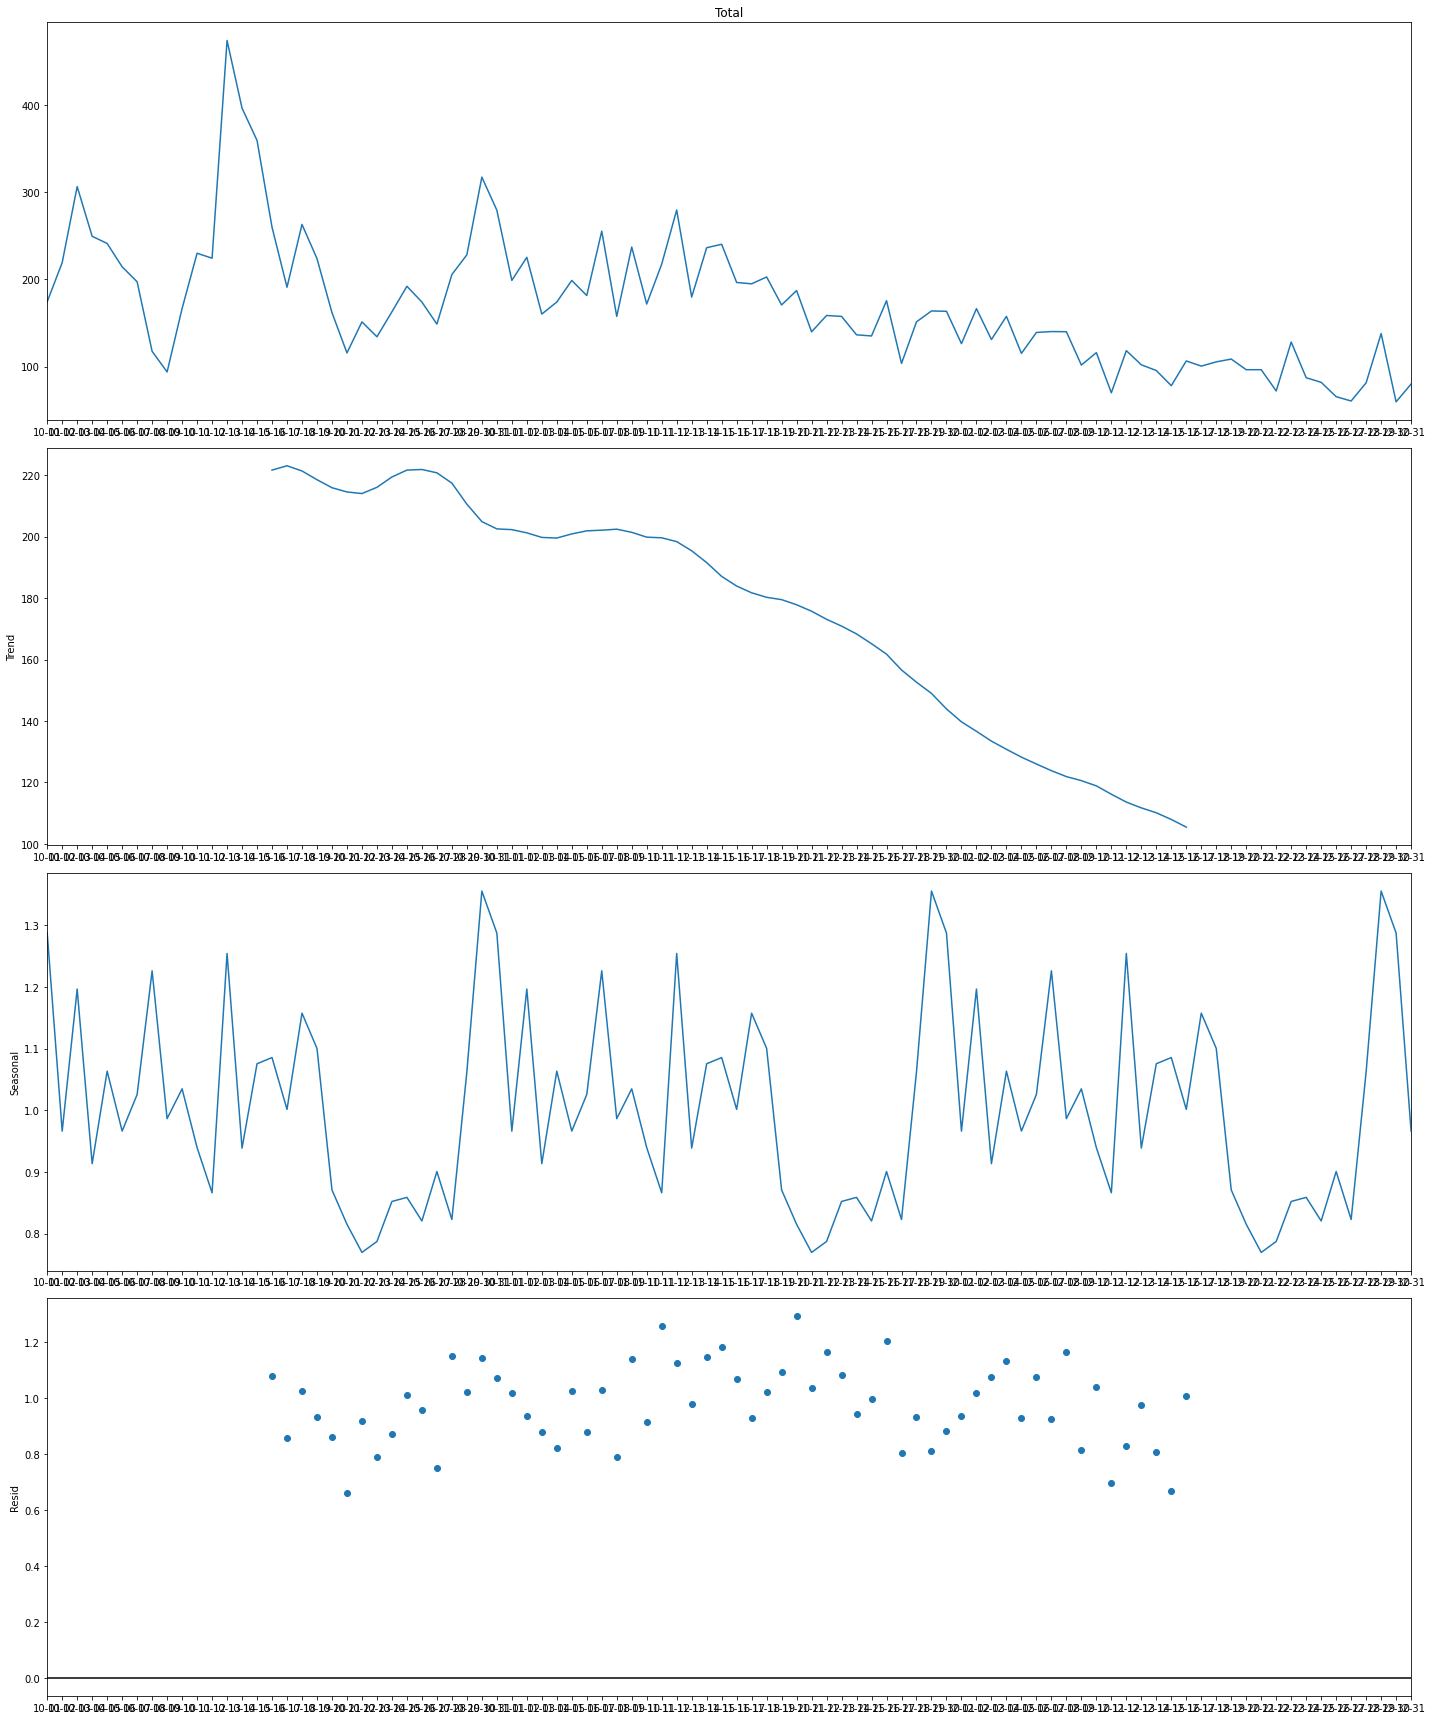

In [106]:
decomposition = sm.tsa.seasonal_decompose(data.Total, model='multiplicative', period=30) # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

In [114]:
train_len = 60
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24 months as out-of-time test set

In [115]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Total'][train_len-1]

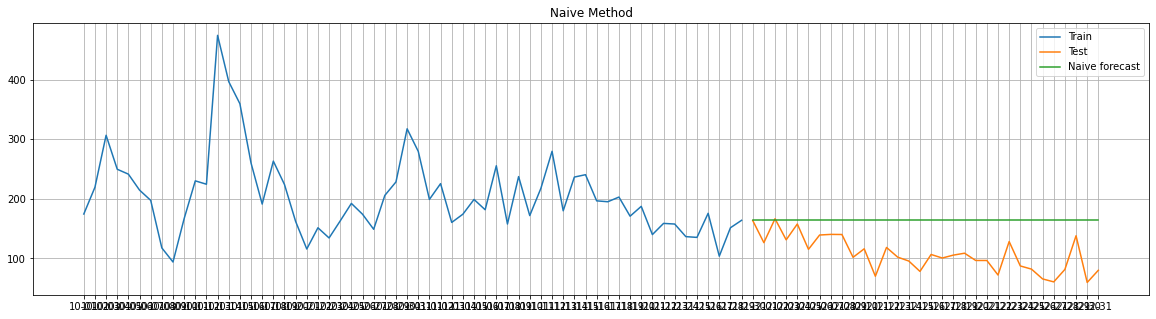

In [116]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['Total'], label='Train')
plt.plot(test['Total'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [117]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Total'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Total']-y_hat_naive['naive_forecast'])/test['Total'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

Method   RMSE   MAPE
0  Naive method  63.79  65.49